# *Mall Customer Analysis*
***
This dataset was provided by @Lasheen, you can download it from: https://github.com/lasheencode/Serial-AI_Mall-Customer-Analysis
## Project
The idea of this project is to some EDA in order to get to know the data before start our model. The goal of this task is to do a customer segmentation so the marketing team can make proper strategies in order to catch the audience.

In [1]:
import pandas as pd

data = pd.read_csv('D:\Programacion\Proyectos\Data Science\Mall Customer\dataset\Mall_Customers.csv', delimiter=',')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## First comments
The dataset is really small. Only 200 instances, that could be a problem depending of what we want to apply. The features that we are going to work with are: gender, age, income, spending score. The last one seems to be a score that measures the amount of money that was spent. From a business perspective the spending score is going to be the most important feature.<br><br> In economics, it is well known that the more you earn, the more you spend. But in this dataset that  is not necessarily True, so it would be nice to check. <br><br>It is said as well that gender is really important to explain annual income, basically, male > female. It is not our main purpose to tackle this questions here, but would be nice to check it as well.

## Tasks
- The more you earn, the more you spend? <br>
- Is gender important explaining the annual income or the spending score of the customers? <br>
- Is Age important?
- Finding Clusters


## *The more you earn, the more you spend?*
We are going to start by exploring the relation beetwen *Anual Income and Spending Score*. The idea is to check if in this dataset the people that has higher income is the one who spend the most as well.

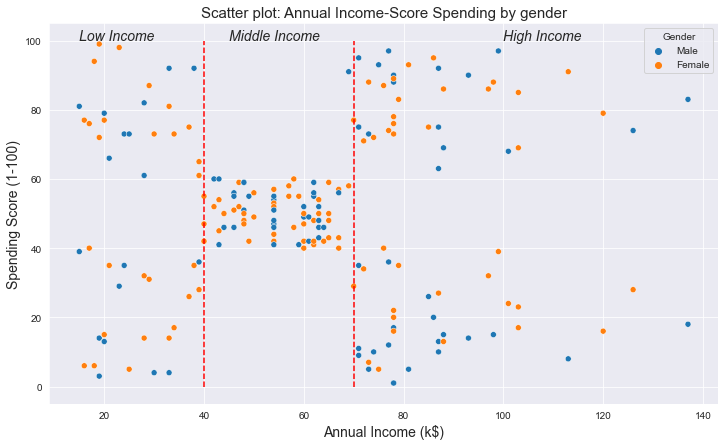

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

sns.set_style('darkgrid')

# Start the subplot
fig1, ax = plt.subplots(figsize=(12,7))

# Make the scatter plot, plot Male and Female cases.
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
ax.legend(title='Gender', loc='upper right')
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

# Add lines to divide the plot base on income
line_lowincome, line_middleincome = Line2D([40,40], [0,100], color='red', ls='--'), Line2D([70,70], [0,100], color='red', ls='--')

# Add the lines
ax.add_line(line_lowincome)
ax.add_line(line_middleincome)

# Set the title
plt.title('Scatter plot: Annual Income-Score Spending by gender', fontsize=15)

# Add tect to each part of the graph.
ax.text(100, 100, 'High Income', fontsize=14, fontstyle='italic')
ax.text(45,100, 'Middle Income', fontsize=14, fontstyle='italic')
ax.text(15,100, 'Low Income', fontsize=14, fontstyle='italic')

plt.show()

First, the data seems unreasonable. The segments are well defined and the behavior is strange. It is not common to find this kind of dataset in the real world, so we can assume that it was probably artificially generated. Equally, we are going to dig deeper and try to apply some clusterization.

As we can see in the graphic there seems to be 3 segments that are really well define. First, we have the "low income" customers that has two main groups, the ones who has a spending score less than 40, and the others who has a spending score that is more than 60. Then, the second group with "middle income" are very concentrated beetwen >40 and <60. And the last one, "high income" group has a similar behaviour as the low income group. <br><br>

As we pointed at the beggining, the distribution of the points are pretty strange. I can't find a rational reason for this behavior. We are working with a database of 200 instances, maybe this picture if pure coincidence, but there is nothing that we can say about this. <br><br>

We are going to perform a t-test for the mean of the spending score beetwen the high income and low income groups to be sure that there is no statistical difference and we are going to check the corr between the 2 variables as well.

In [22]:
from scipy.stats import ttest_ind, pearsonr

low_income = data.loc[data['Annual Income (k$)'] <= 40, 'Spending Score (1-100)']
high_income = data.loc[data['Annual Income (k$)'] > 70, 'Spending Score (1-100)']

print(ttest_ind(low_income, high_income))
corr, _ = pearsonr(data['Spending Score (1-100)'], data['Annual Income (k$)'])
print(corr)

Ttest_indResult(statistic=-0.11993768389997406, pvalue=0.9047298006130966)
0.009902848094037645


So, **the more you earn the more you spend?** It doesnt seem True in this case. We actually dont know what the 'spending score' is, but if it is the amount of money that the customer has spent in the mall in any interval of time, there is no apparent relation between Annual Income and Spending habits.

## *Is gender important explaining the annual income or the spending score of the customers?* <br>
In order to determine if gender is an important feature to explain Annual Income and Spending Score we are going to work with the categories that were define earlier (low income, etc) and check for the average income and spending score overall and on each category. Sometimes the mean could not be the best indicator in a distribution, but in this EDA we are going to work with it.

In [4]:
import numpy as np

# Create a custom variable base on Annual Income to get more information base on the previous graphic
# Low Income <= 40k, Middle Income > 40 and <= 70, else High Income
data['Income Category'] = np.select([data['Annual Income (k$)'] <= 40, (data['Annual Income (k$)'] > 40) & (data['Annual Income (k$)'] <= 70), 
                                        data['Annual Income (k$)'] > 70], ['Low Income', 'Middle Income', 'High Income'])

data[['Annual Income (k$)', 'Spending Score (1-100)', 'Income Category', 'Gender']].groupby(['Income Category', 'Gender']).describe()

Annual Income (k$)                                     \
                                    count       mean        std   min    25%   
Income Category Gender                                                         
High Income     Female               37.0  88.378378  15.115024  72.0  78.00   
                Male                 37.0  86.540541  17.249146  71.0  75.00   
Low Income      Female               32.0  28.625000   8.834500  16.0  19.75   
                Male                 18.0  25.222222   7.191135  15.0  20.00   
Middle Income   Female               43.0  56.976744   8.212906  42.0  49.50   
                Male                 33.0  55.151515   7.850642  42.0  48.00   

                                           Spending Score (1-100)             \
                         50%    75%    max                  count       mean   
Income Category Gender                                                         
High Income     Female  81.0  99.00  126.0                   37.0  55.027027   
                Male    81.0  88.00  137.0                   37.0  45.351351   
Low Income      Female  29.0  37.25   40.0                   32.0  49.937500   
                Male    24.0  29.50   39.0                   18.0  48.666667   
Middle Income   Female  58.0  63.50   70.0                   43.0  49.697674   
                Male    54.0  62.00   69.0                   33.0  51.969697   

                                                                   
                              std   min    25%   50%    75%   max  
Income Category Gender                                             
High Income     Female  30.908904   5.0  24.00  71.0  85.00  95.0  
                Male    35.905134   1.0  12.00  35.0  75.00  97.0  
Low Income      Female  29.445343   5.0  27.50  44.5  75.25  99.0  
                Male    32.400073   3.0  17.75  50.0  77.50  92.0  
Middle Income   Female   7.869576  29.0  43.50  50.0  54.50  77.0  
                Male     9.159984  41.0  46.00  51.0  56.00  91.0

First thing to notice is that 56% of the instances corresponds to the female gender. And second, but not less important is the std of the spending score groups, if we look at the middle income std we notice that it is really low compared to the other groups, this is another way to see what we have already noticed in the previous graphic, in this group the spending score is concentrated.

* #### High Income
The female group earn 2k more annually on average, and has on 10 points more of spending Score on average.

* #### Middle Income
Again the female group earn almost 2k more annually on average, but males has 2 points more of spending Score on average.

* #### Low Income
Females earn almost 2.5k more annually on average, and also has 1.3 points more on average of spending Score.

So, base on this numbers we can't say that there is a Gender bias in the data set. Actually, it seems that females earn more than males, but differences are small. The most important difference between genders was in the spending score category for high income individuals.

It is important to notice the count on each group. If we compute the mean of Annual Income or Spending Score for the whole dataset, it is posible that males statistics will be higher than females. The reason for this is the imbalance of the dataset, when we compute the mean we have to divide the sum of the values by the number of instances.

In [5]:
data[['Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].groupby('Gender').describe()

Annual Income (k$)                                                  \
                    count       mean        std   min    25%   50%    75%   
Gender                                                                      
Female              112.0  59.250000  26.011952  16.0  39.75  60.0  77.25   
Male                 88.0  62.227273  26.638373  15.0  45.50  62.5  78.00   

              Spending Score (1-100)                                        \
          max                  count       mean       std  min   25%   50%   
Gender                                                                       
Female  126.0                  112.0  51.526786  24.11495  5.0  35.0  50.0   
Male    137.0                   88.0  48.511364  27.89677  1.0  24.5  50.0   

                    
         75%   max  
Gender              
Female  73.0  99.0  
Male    70.0  97.0

So, if we compute the mean for the whole dataset men earn 3k more annualy on average than women, but women on average has a higher spending score. If we just annalyze this picture, we could have just confirmed that effectively men earn more but spend less, which is not true for all categories.

So, **Is gender important explaining the annual income or the spending score of the customers?** No, it isnt. The differences are not significant. The only thing that is important to notice for the marketing team is that high income women on average spend way more than men.

## Is Age important?
In this case, we are going to analyze if age is important in order to explain Annual Income and Spending Score, and after this, we are going to proceed to build the cluster model.

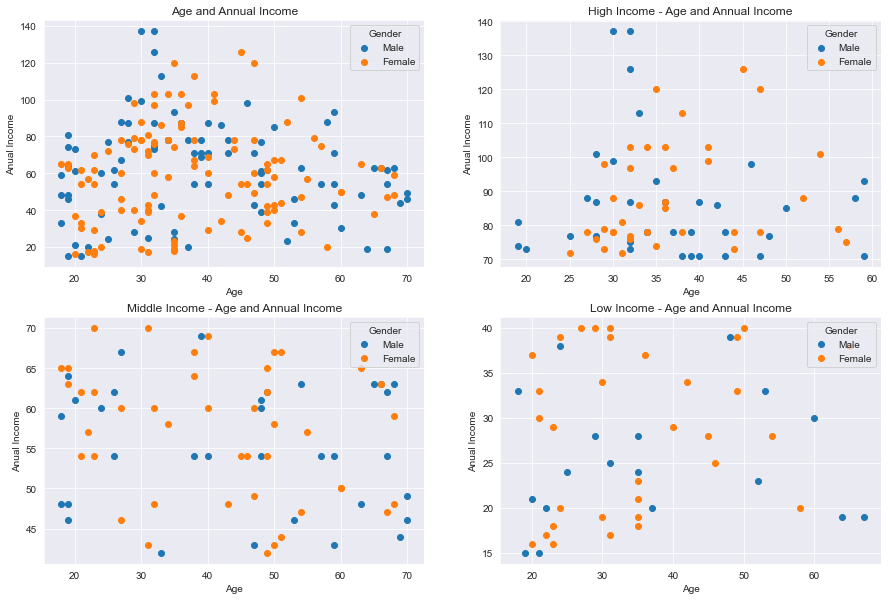

In [6]:
# Initialize the subplots
fig2, axs = plt.subplots(2, 2, figsize=(15,10))

# Initialize the list and the counter to use in the for loop
high_income = data[data['Income Category'] == 'High Income']
middle_income = data[data['Income Category'] == 'Middle Income']
low_income = data[data['Income Category'] == 'Low Income']
income = [high_income, middle_income, low_income]
income_title = ['High Income', 'Middle Income', 'Low Income']
counter = 0

# For each row
for i in range(2):
    # For each column
    for j in range(2):
        # It is is the first graphic, plot the whole dataset       
        if i == 0 and j == 0:
            axs[i, j].scatter(data.loc[data['Gender'] == 'Male', 'Age'], data.loc[data['Gender'] == 'Male', 'Annual Income (k$)'], label = 'Male')
            axs[i, j].scatter(data.loc[data['Gender'] == 'Female', 'Age'], data.loc[data['Gender'] == 'Female', 'Annual Income (k$)'], label = 'Female')
            axs[i, j].set_title('Age and Annual Income')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Anual Income')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
        # Plot the different categories
        else:
            axs[i, j].scatter(income[counter].loc[income[counter]['Gender'] == 'Male', 'Age'], income[counter].loc[income[counter]['Gender'] == 'Male', 'Annual Income (k$)'], label = 'Male')
            axs[i, j].scatter(income[counter].loc[income[counter]['Gender'] == 'Female', 'Age'], income[counter].loc[income[counter]['Gender'] == 'Female', 'Annual Income (k$)'], label = 'Female')
            axs[i, j].set_title(income_title[counter] + ' - Age and Annual Income')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Anual Income')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
            # Increment the counter to set the title plot for each category.
            counter += 1
plt.show()


At first glance there is no apparent relation between age and income. The only thing that is noticeable is that the higher incomes are beetwen 30s and middle 50s.

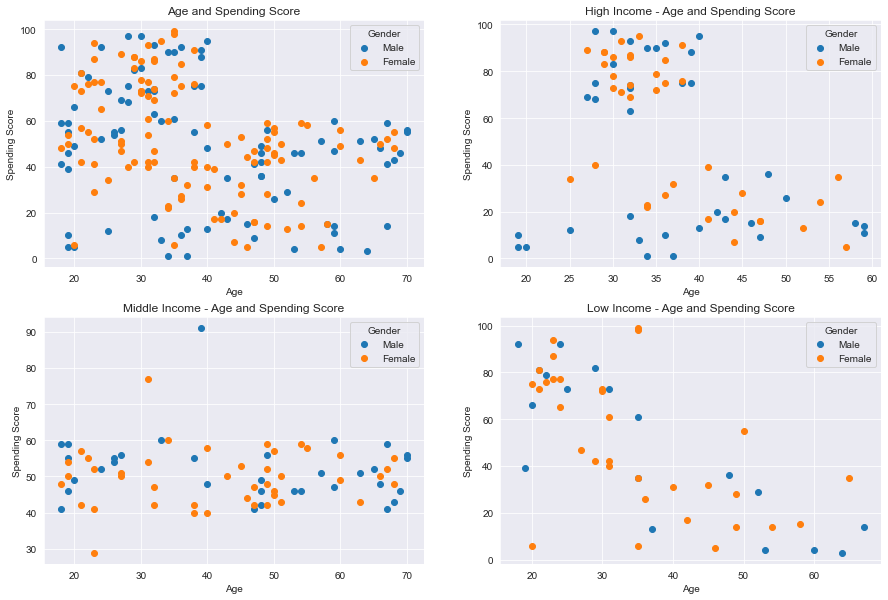

In [7]:
# Initialize the subplots
fig3, axs = plt.subplots(2, 2, figsize=(15,10))

# Initialize the list and the counter to use in the for loop
counter = 0

# For each row
for i in range(2):
    # For each column
    for j in range(2):
        # It is is the first graphic, plot the whole dataset       
        if i == 0 and j == 0:
            axs[i, j].scatter(data.loc[data['Gender'] == 'Male', 'Age'], data.loc[data['Gender'] == 'Male', 'Spending Score (1-100)'], label = 'Male')
            axs[i, j].scatter(data.loc[data['Gender'] == 'Female', 'Age'], data.loc[data['Gender'] == 'Female', 'Spending Score (1-100)'], label = 'Female')
            axs[i, j].set_title('Age and Spending Score')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Spending Score')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
        # Plot the different categories
        else:
            axs[i, j].scatter(income[counter].loc[income[counter]['Gender'] == 'Male', 'Age'], income[counter].loc[income[counter]['Gender'] == 'Male', 'Spending Score (1-100)'], label = 'Male')
            axs[i, j].scatter(income[counter].loc[income[counter]['Gender'] == 'Female', 'Age'], income[counter].loc[income[counter]['Gender'] == 'Female', 'Spending Score (1-100)'], label = 'Female')
            axs[i, j].set_title(income_title[counter] + ' - Age and Spending Score')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Spending Score')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
            # Increment the counter to set the title plot for each category.
            counter += 1
plt.show()

This plot is more interesting than the previous one. At first, in the complete dataset plot it is very clear that the spending scores are higher at lower ages, after 40s it constantly dropps to <60. This kind of behaviour is strange, so again we have to consider this data with a lot of precautions. It would be wise to check the process in which the data was obtained.

If we check the categories, it seems that the higher score are in the lower and higher incomes (except for 2 outliers in the middle income category) between the ages of 20 and 40. 

So, **Is age important to explain annual income and spending score?** Well, the answer it is not clear, as for the annual income there isnt an explicit relation beetwen the 2 variables, but for age and spending score it is clear that in this dataset younger people has bigger spending scores.

## Summary of the findings
* **The more you earn the more you spend?** It doesnt seem True in this case. We actually dont know what the 'spending score' is, but if it is the amount of money that the customer has spent in the mall in any interval of time, there is no apparent relation beetwen Annual Income and Spending habits
* **Is gender important explaining the annual income or the spending score of the customers?** No, it isnt. The differences are not significant. The only thing that is important to notice for the marketing team is that high income women on average spend way more than men.
* **Is age important to explain annual income and spending score?** As for the annual income people between 30 and 50 years old seems to be the richest ones, and for spending score it is clear that in this dataset younger people spend the most.



## Clusters

At the beginning we are going to explore the variables and prepare the dataset.

It seems that the customerId were provided based on the Annual Income, we are going to drop it. Next, we are goin to codify the gender.

In [8]:
data = data.drop(['Income Category', 'CustomerID'], axis = 1)

# Change the values of Gender
data['new_gender'] = np.select([data['Gender'] == 'Female', data['Gender'] == 'Male'], [1, 0])
data = data.drop(['Gender'], axis = 1)

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0
new_gender,200.0,0.56,0.497633,0.0,0.00,1.0,1.0,1.0


It is not clear if we are going to have problems with the scale, but we can check it visually.

<AxesSubplot:xlabel='variable', ylabel='value'>

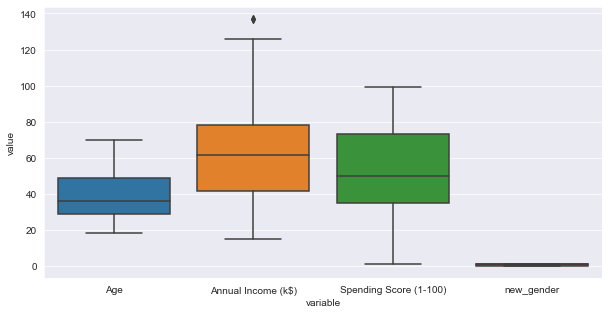

In [9]:
fig4, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=pd.melt(data))

The variables are in similar ranges. I have tried with the Standard Scaler, and the scores using Elbow and Silhouette were better without it, so we are going to continue with the variables as the are.

### Outliers
We could use DBSCAN and Single Linkage to try to find outliers, but it is not something that we are going to do here. 
It is important to know that it is something that must be done in practice.

### KMeans
We are going to use KMeans. 

In this case, we have to provide the number of clusters (K) beforehand. So, in order to make that decision we are going to use Elbow and Silhouette methods.

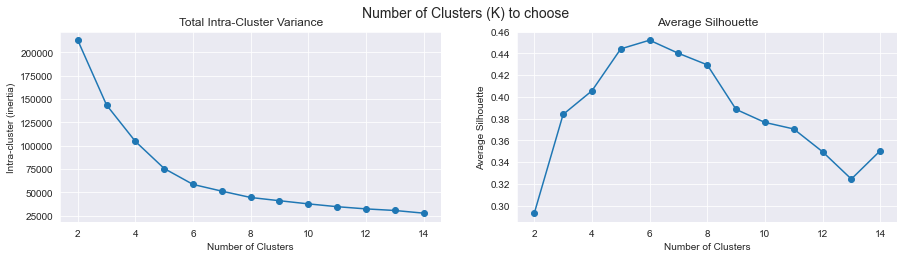

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 15)
inertias = []
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        )
    modelo_kmeans.fit(data)
    inertias.append(modelo_kmeans.inertia_)

    cluster_labels = modelo_kmeans.predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 2, figsize=(15, 3.5))

fig.suptitle('Number of Clusters (K) to choose', fontsize=14)
ax[0].plot(range_n_clusters, inertias, marker='o')
ax[0].set_title("Total Intra-Cluster Variance")
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intra-cluster (inertia)')

ax[1].plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax[1].set_title("Average Silhouette")
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Average Silhouette');

From the graphics it is not clear what we have to use. Elbow method does not "break" in any particular number of K, and if we check Silhouette we can notice that there is no big difference between 5, 6 or 7. So, the first conclusion is that there is no strong evidence to confirm any Cluster structure. That does not mean that we can't provide useful information to the marketing team, we can still try to find segments by forcing KMeans to create groups.

As we don't know what K to choose, at the beginning we are going to use K = 3 following the intuition of low, middle and high income. And then we are going to try with 6 that has the max Silhouette Score.

Text(0, 0.5, 'Annual Income (k$)')

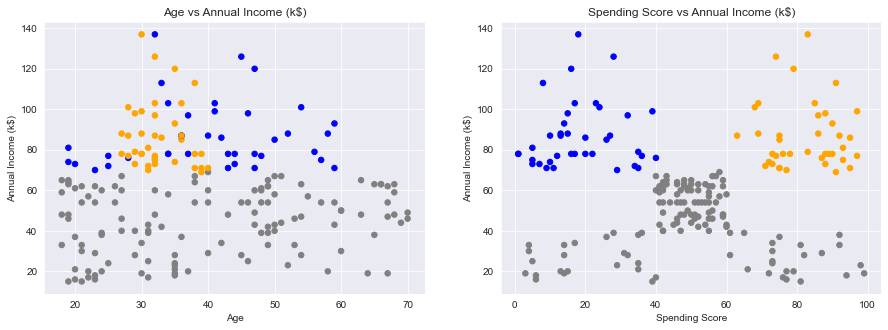

In [11]:
fig7, axs = plt.subplots(1, 2, figsize = (15, 5))

km = KMeans(n_clusters=3).fit(data)
predictions = km.predict(data)

colores = ['orange', 'blue', 'gray']
asignar = []
for row in predictions:
    asignar.append(colores[row])

axs[0].scatter(data['Age'], data['Annual Income (k$)'], c = asignar, s = 30)
axs[0].set_title('Age vs Annual Income (k$)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Annual Income (k$)')

axs[1].scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'], c = asignar, s = 30)
axs[1].set_title('Spending Score vs Annual Income (k$)')
axs[1].set_xlabel('Spending Score')
axs[1].set_ylabel('Annual Income (k$)')

In order to make a profile of each Cluster, we are going to use Boxplots.

Text(0.5, 0.98, 'Segments Profiles')

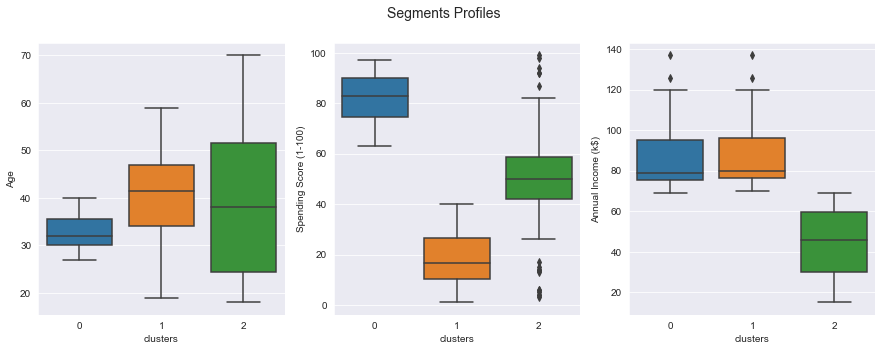

In [12]:
data = data.join(pd.DataFrame(predictions))
data.rename(columns={0:'clusters'}, inplace=True)

fig8, ax = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(data=data, x='clusters', y='Age', ax=ax[0])
sns.boxplot(data=data, x='clusters', y='Spending Score (1-100)', ax=ax[1])
sns.boxplot(data=data, x='clusters', y='Annual Income (k$)', ax=ax[2])
fig8.suptitle('Segments Profiles', fontsize=14)

### Segments
* #### Middle Age, Low Spending Score and High Income (orange)
The first segment is clearly defined. The majority of people are in the range of 35-45 years old, and has the minimum spending score of all groups with high incomes.

* #### Medium Spending Score and low Income (green)
The second segment is not defined for the age, but has medium spending scores and low incomes.

* #### Middle low age, High Spending Score and High Income (blue)
The last segment are young people with high spending and incomes.

So, in this case the segments are well defined. The variable that really discriminates between groups is Spending Score. Let's see what happens if we try with 6 segments.


Text(0, 0.5, 'Annual Income (k$)')

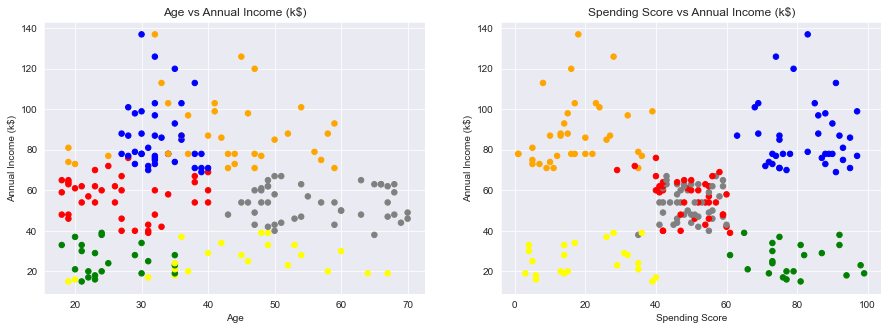

In [15]:
fig9, axs = plt.subplots(1, 2, figsize = (15, 5))

km = KMeans(n_clusters=6).fit(data)
predictions = km.predict(data)

colores = ['orange', 'blue', 'gray', 'yellow', 'green', 'red']
asignar = []
for row in predictions:
    asignar.append(colores[row])

axs[0].scatter(data['Age'], data['Annual Income (k$)'], c = asignar, s = 30)
axs[0].set_title('Age vs Annual Income (k$)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Annual Income (k$)')

axs[1].scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'], c = asignar, s = 30)
axs[1].set_title('Spending Score vs Annual Income (k$)')
axs[1].set_xlabel('Spending Score')
axs[1].set_ylabel('Annual Income (k$)')

Text(0.5, 0.98, 'Segments Profiles K=6')

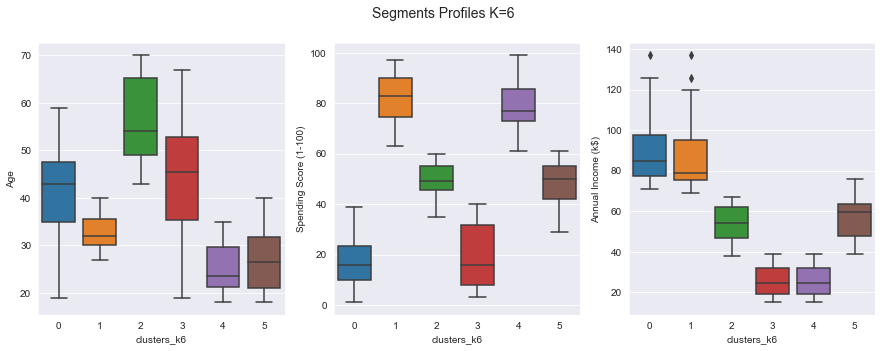

In [18]:
data = data.join(pd.DataFrame(predictions))
data.rename(columns={0:'clusters_k6'}, inplace=True)

fig10, ax = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(data=data, x='clusters_k6', y='Age', ax=ax[0])
sns.boxplot(data=data, x='clusters_k6', y='Spending Score (1-100)', ax=ax[1])
sns.boxplot(data=data, x='clusters_k6', y='Annual Income (k$)', ax=ax[2])
fig10.suptitle('Segments Profiles K=6', fontsize=14)

Noticing the structure of the data we could have tried with 5 clusters as well, and we would have arrived to a reasonable answer as well.

In this case, all variables takes precedence. But the most importants are Spending Score and Annual Income. If we recall the differents scatter plots with those variables it was quite clear what KMeans would do.

Thinking about business, having so many segments does not seem reasonable considering the amount of data we have. But the last step is to present the findings to an expert on the business part and check if the segments makes sense to them base on experience.

### Conclusion
Observing the structure of the data at the beginning we could have guess the result of the KMeans algorithm. We have tried with K=3 and K=6 and got ineteresting results.

We have noticed that there is no clear relation between Spending Score and Annual Income, that the gender is not a variable that can explain the differences in spending habits, but that high income woman spend more on average than men. And finally, we have found that younger people spend the most.

As for what to recommend to the mkt team, the last step is to talk about the findings with an expert and require more information in order to make better profiles. But we have achieved a nice analysis in order to start that conversation.